In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
showid = 0 # from 0 to 4
assert showid in range(5)

In [2]:
import sys
print(sys.path[0])

import os
print(os.getcwd())


/media
/media


Groundtruth
(1, 231, 222, 286) (3, 4)


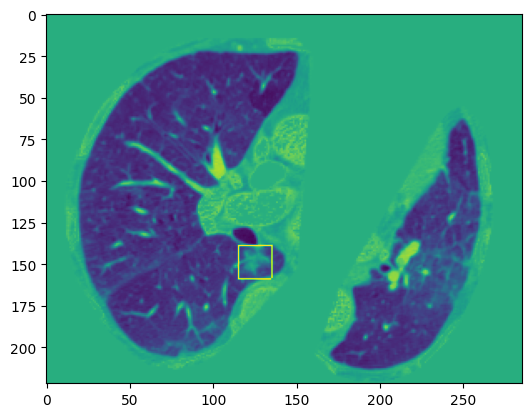

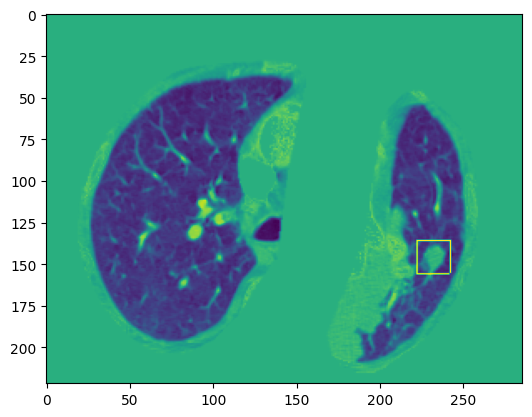

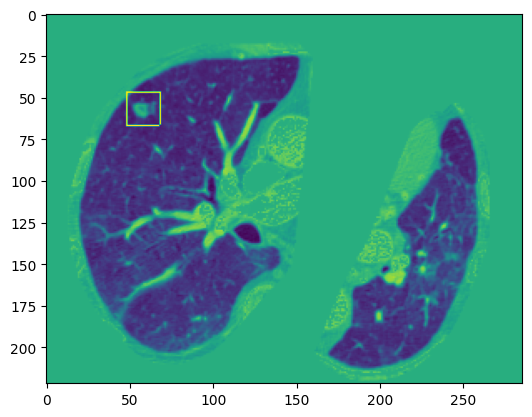

In [5]:
srslst = ['1.3.6.1.4.1.14519.5.2.1.6279.6001.208737629504245244513001631764',\
          '1.3.6.1.4.1.14519.5.2.1.6279.6001.108231420525711026834210228428',\
          '1.3.6.1.4.1.14519.5.2.1.6279.6001.161002239822118346732951898613',\
          '1.3.6.1.4.1.14519.5.2.1.6279.6001.162901839201654862079549658100',\
          '1.3.6.1.4.1.14519.5.2.1.6279.6001.179162671133894061547290922949']
# ctdat = np.load('./CT/'+srslst[showid]+'_clean.npy', allow_pickle=True)
# ctlab = np.load('./CT/'+srslst[showid]+'_label.npy', allow_pickle=True)
'''以下3行 pycharm中使用'''
current_path = '/media/jz/DeepLung-master/DeepLungDetectionDemo' # 当前路径
ctdat = np.load(current_path+'/CT/'+srslst[showid]+'_clean.npy', allow_pickle=True)
ctlab = np.load(current_path+'/CT/'+srslst[showid]+'_label.npy', allow_pickle=True)
print('Groundtruth')
print(ctdat.shape, ctlab.shape)
for idx in range(ctlab.shape[0]):
    if abs(ctlab[idx,0])+abs(ctlab[idx,1])+abs(ctlab[idx,2])+abs(ctlab[idx,3])==0: continue
    fig = plt.figure()
    z, x, y = int(ctlab[idx,0]), int(ctlab[idx,1]), int(ctlab[idx,2])
    dat0 = np.array(ctdat[0, z, :, :])
    dat0[max(0,x-10):min(dat0.shape[0],x+10), max(0,y-10)] = 255
    dat0[max(0,x-10):min(dat0.shape[0],x+10), min(dat0.shape[1],y+10)] = 255
    dat0[max(0,x-10), max(0,y-10):min(dat0.shape[1],y+10)] = 255
    dat0[min(dat0.shape[0],x+10), max(0,y-10):min(dat0.shape[1],y+10)] = 255
    plt.imshow(dat0)
plt.show()

Detection Results according to confidence


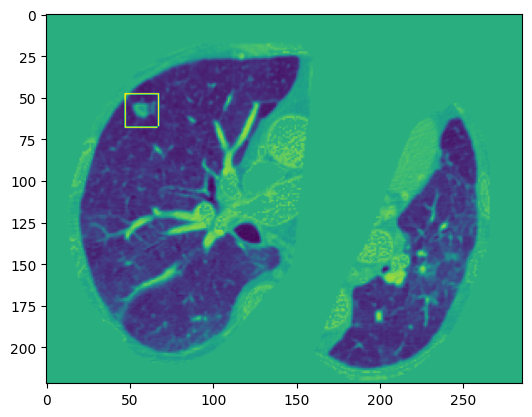

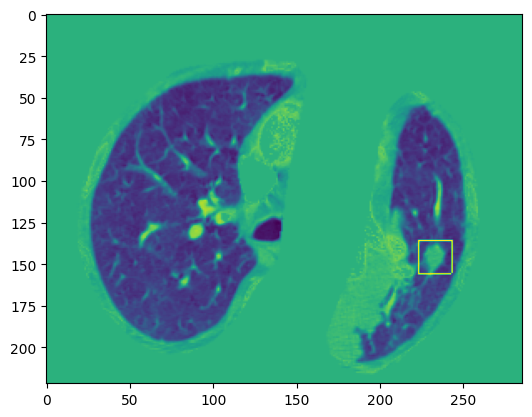

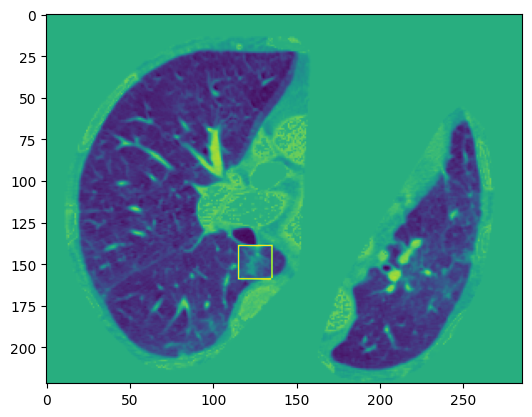

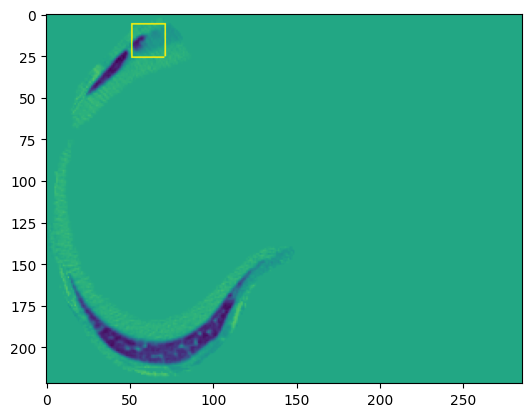

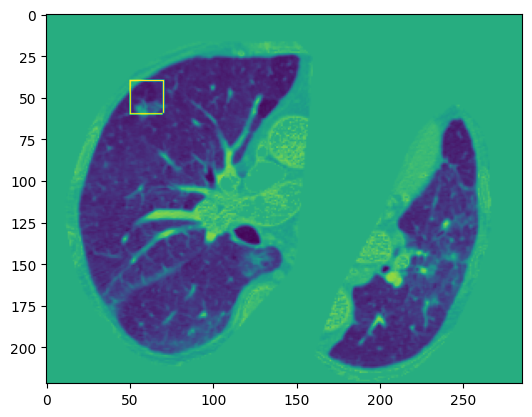

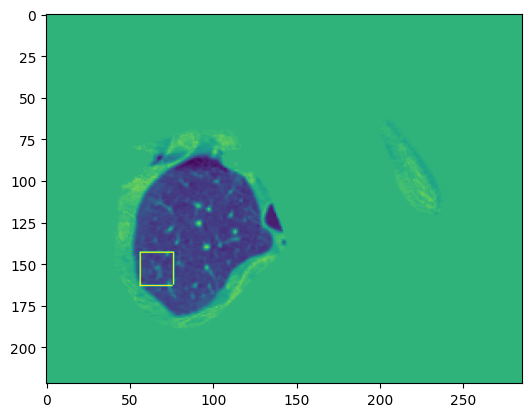

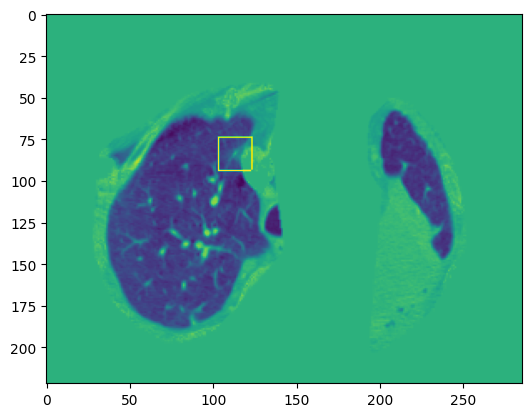

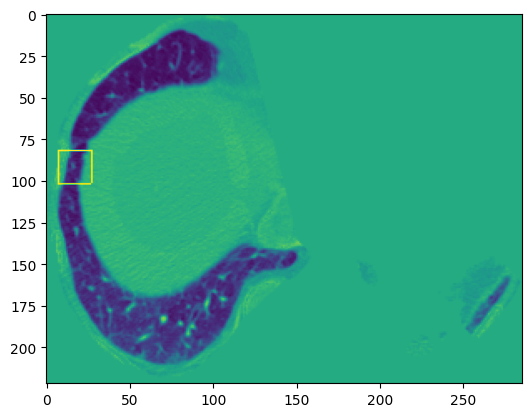

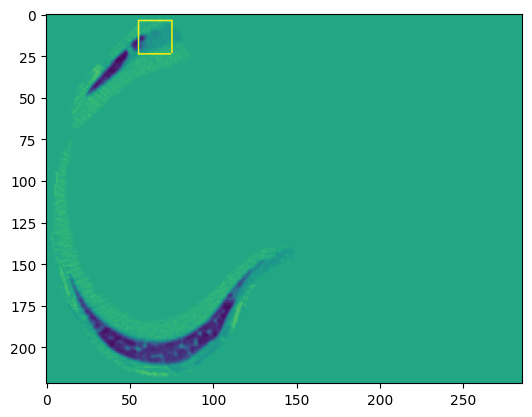

In [6]:
def iou(box0, box1):
    r0 = box0[3] / 2
    s0 = box0[:3] - r0
    e0 = box0[:3] + r0
    r1 = box1[3] / 2
    s1 = box1[:3] - r1
    e1 = box1[:3] + r1
    overlap = []
    for i in range(len(s0)): overlap.append(max(0, min(e0[i], e1[i]) - max(s0[i], s1[i])))
    intersection = overlap[0] * overlap[1] * overlap[2]
    union = box0[3] * box0[3] * box0[3] + box1[3] * box1[3] * box1[3] - intersection
    return intersection / union
def nms(output, nms_th):
    if len(output) == 0: return output
    output = output[np.argsort(-output[:, 0])]
    bboxes = [output[0]]
    for i in np.arange(1, len(output)):
        bbox = output[i]
        flag = 1
        for j in range(len(bboxes)):
            if iou(bbox[1:5], bboxes[j][1:5]) >= nms_th:
                flag = -1
                break
        if flag == 1: bboxes.append(bbox)
    bboxes = np.asarray(bboxes, np.float32)
    return bboxes
# pbb = np.load('./detection/'+srslst[showid]+'_pbb.npy')
# lbb = np.load('./detection/'+srslst[showid]+'_lbb.npy')
'''以下3行 pycharm中使用'''
current_path = '/media/jz/DeepLung-master/DeepLungDetectionDemo' # 当前路径
pbb = np.load(current_path+'/detection/'+srslst[showid]+'_pbb.npy')
lbb = np.load(current_path+'/detection/'+srslst[showid]+'_lbb.npy')
pbb = np.array(pbb[pbb[:,0] > -2])
pbb = nms(pbb, 0.1)
# print pbb.shape, pbb
print('Detection Results according to confidence')
for idx in range(pbb.shape[0]):
    fig = plt.figure()
    z, x, y = int(pbb[idx,1]), int(pbb[idx,2]), int(pbb[idx,3])
#     print z,x,y
    dat0 = np.array(ctdat[0, z, :, :])
    dat0[max(0,x-10):min(dat0.shape[0],x+10), max(0,y-10)] = 255
    dat0[max(0,x-10):min(dat0.shape[0],x+10), min(dat0.shape[1],y+10)] = 255
    dat0[max(0,x-10), max(0,y-10):min(dat0.shape[1],y+10)] = 255
    dat0[min(dat0.shape[0],x+10), max(0,y-10):min(dat0.shape[1],y+10)] = 255
    plt.imshow(dat0)